In [1]:
import spacy
import medspacy
from medspacy.visualization import visualize_dep,visualize_ent
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt

# Medical Data retrieved from Dadeldhura Hospital & mtsamples.com

## Data Preprocessing

In [2]:
with open('MedicalData.txt','r') as data:
    medical_reports = data.read()
    medical_reports = medical_reports.replace('[','')
    medical_reports = medical_reports.replace(']','')
    medical_reports = medical_reports.replace('\n','')
    try:
        medical_reports = medical_reports.split('",')
    except:
        medical_reports = medical_reports.split("',")
    for i in range(len(medical_reports)):
        medical_reports[i] = medical_reports[i].replace('"','').replace('%','% ').replace('(','( ')
        medical_reports[i] = medical_reports[i].replace('BP-','BP- ')
#         medical_reports[i] = medical_reports[i].replace('blood pressure of','BP- ')
#         medical_reports[i] = medical_reports[i].replace('blood pressure','BP- ')

        medical_reports[i] = medical_reports[i].replace('(WBC)','WBC')
        medical_reports[i] = medical_reports[i].replace('white blood','WBC')
        medical_reports[i] = medical_reports[i].replace('White blood','WBC')
    

        
        
        medical_reports[i] = medical_reports[i].replace('PR-','PR- ')

        medical_reports[i] = medical_reports[i].replace('mmHg',' mmHg')
        medical_reports[i] = medical_reports[i].replace('mm of Hg',' mmHg')
        medical_reports[i] = medical_reports[i].replace('mm of mercury',' mmHg')
        
        medical_reports[i] = medical_reports[i].replace('beats per minute','bpm')
        
        medical_reports[i] = medical_reports[i].replace('oxygen saturation','SpO2 ')
#         medical_reports[i] = medical_reports[i].replace('SPO2','SpO2 ')
    medical_reports.remove('')

In [3]:
medical_reports

["A 38-year-old male presented to the emergency department ( ED) with complaints of fever, headache, retro-orbital pain, and myalgia of one-week duration. The patient reported high-grade intermittent fever for the past seven days that was associated with rigors and chills. His other complaints included reddish-colored urine with clots for two days along with two episodes of gum bleed. The pertinent denials included sore throat, chest pain, shortness of breath, vomiting, abdominal pain, diarrhea, burning micturition, dysuria, urinary frequency, and contact with animals. On physical examination, the patient was vitally stable, oriented to person, place and time, and had mild conjunctival pallor. On skin examination, there were multiple purpura and petechiae on the left shoulder, trunk, and both legs, and two large ecchymotic lesions on the patient's back. The rest of the systemic examination was unremarkable.The baseline workup done in the ED was normal except for a low platelet count of

# English NLP model

In [4]:
en_nlp = spacy.load('en_core_web_sm')

In [5]:
en_nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
en_nlp.get_pipe('ner').labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

# Medical Chemicals & Disease Recognition Model

In [7]:
med_nlp = medspacy.load('en_ner_bc5cdr_md')

In [8]:
med_nlp.component_names

['tok2vec',
 'tagger',
 'attribute_ruler',
 'lemmatizer',
 'parser',
 'ner',
 'medspacy_pyrush',
 'medspacy_target_matcher',
 'medspacy_context']

In [9]:
med_nlp.get_pipe('ner').labels

('CHEMICAL', 'DISEASE')

In [10]:
med_nlp.remove_pipe('medspacy_pyrush')

('medspacy_pyrush',
 <PyRuSH.PyRuSHSentencizer.PyRuSHSentencizer at 0x7f87d6e97280>)

In [11]:
med7_nlp = medspacy.load('en_core_med7_lg')

# Data Analysis

In [12]:
x = medical_reports[0]
x

"A 38-year-old male presented to the emergency department ( ED) with complaints of fever, headache, retro-orbital pain, and myalgia of one-week duration. The patient reported high-grade intermittent fever for the past seven days that was associated with rigors and chills. His other complaints included reddish-colored urine with clots for two days along with two episodes of gum bleed. The pertinent denials included sore throat, chest pain, shortness of breath, vomiting, abdominal pain, diarrhea, burning micturition, dysuria, urinary frequency, and contact with animals. On physical examination, the patient was vitally stable, oriented to person, place and time, and had mild conjunctival pallor. On skin examination, there were multiple purpura and petechiae on the left shoulder, trunk, and both legs, and two large ecchymotic lesions on the patient's back. The rest of the systemic examination was unremarkable.The baseline workup done in the ED was normal except for a low platelet count of 

In [13]:
en_report = en_nlp(x)
displacy.render(en_report,style='ent',jupyter=True)

In [14]:
med7_report = med7_nlp(x)
displacy.render(med7_report,style='ent',jupyter=True)

In [15]:
report = med_nlp(x)

In [16]:
for ent in report.ents:
    print(ent.label_,":",ent.text)

DISEASE : complaints of fever
DISEASE : headache
DISEASE : retro-orbital pain
DISEASE : myalgia
DISEASE : fever
DISEASE : rigors
DISEASE : chills
DISEASE : sore throat
DISEASE : chest pain
DISEASE : shortness of breath
DISEASE : vomiting
DISEASE : abdominal pain
DISEASE : diarrhea
DISEASE : dysuria
DISEASE : conjunctival pallor
DISEASE : purpura
DISEASE : petechiae
DISEASE : ecchymotic lesions
DISEASE : DHF
DISEASE : Dengue Hemorrhagic Fever
CHEMICAL : acetaminophen
DISEASE : gums bleed
DISEASE : L. Infectious diseases
DISEASE : fever
DISEASE : bleeding
DISEASE : bleeding


In [17]:
displacy.render(report,style='ent',jupyter=True)

# Negated Existance

In [18]:
test_report = med_nlp('There is no evidence of pneumonia.')
visualize_ent(test_report)
visualize_dep(test_report)

# History

In [19]:
test_report = med_nlp('Her mother suffered from leukemia.')
visualize_ent(test_report)
visualize_dep(test_report)

# Possible

In [20]:
test_report = med_nlp('Likely suffering from fever.')
visualize_ent(test_report)
visualize_dep(test_report)

# Information Extraction

In [21]:
def ExtractInfo(report):
    sex = 'NA'
    age = 'NA'
    vitals = {}
    Entities = ['WBC','platelet']
    
    sentence_breakers = ['.','(',')',',']
    for token in report:
        
        if sex == 'NA':
            if token.text == 'male' or token.text == 'female':
                sex = token.text
            if token.text.lower() == 'his':
                sex = 'male'
            if token.text.lower() == 'her':
                sex = 'female'
                
        if token.like_num:
            
            if '/' in token.text:
                if 'pressure' in report[token.i-1].text or 'pressure' in report[token.i-2].text or 'bp' in report[token.i-1].text.lower():
                    vitals['Blood Pressure'] = token.text
                continue
            try:
                if report[token.i+1].text.lower() == 'bpm':
                    try:
                        a = vitals['Pulse Rate']
                    except:
                        vitals['Pulse Rate'] = token.text
            except:
                pass
            if 'pulse' in report[token.i-1].text.lower():
                try:
                    a = vitals['Pulse Rate']
                except:
                    vitals['Pulse Rate'] = token.text
            continue
                        
        if 'temperature' in token.text.lower():
            index = token.i
            while not report[index].like_num:
                index += 1
            vitals['temperature'] = report[index].text+report[index+1].text
            
        elif 'spo2' in token.text.lower():
            index = token.i
            while not report[index].like_num:
                index += 1
            vitals['SpO2'] = report[index].text
            
        elif 'count' in token.text.lower():
            count = ''
            index = token.i
            entity = report[index-1].text
            if 'wbc' in entity.lower():
                entity = 'WBC'
            else:
                entity = entity.lower()
            while not report[index].like_num:
                index +=1
                if report[index].text in sentence_breakers:
                    entity = 'none'
                    break
            backup_index = index
            try:
                count += report[index].text
                while not 'L' in report[index].text:
                    index+=1
                    count += report[index].text
                    if report[index].text in sentence_breakers:
                        count = 'e'+1+'r'
            except:
                count = report[backup_index].text  #+'x109/L'
            if entity in Entities:
                try:
                    vitals[entity+' count'].append(count)
                except:
                    vitals[entity+' count'] = []
                    vitals[entity+' count'].append(count)
                
    return sex,age,vitals

In [22]:
def Examinations(text_report):
    examination = []
        
    sentences = text_report.split('.')
    initial = med_nlp(sentences[0])

    for sentence in sentences:
        _word = ''
        if 'examination' in sentence:
            _word = 'examination'
        elif 'test' in sentence:
            _word = 'test'
        else:
            continue
        examination_data = {}
        exam_key=''
        sentence_break = sentence.split(_word)
        try:
            exam_key = sentence_break[0].split(' ')[-2]+' examination'
            examination_data[exam_key] = {}
        except:
            continue
        med_data_from_sentence = med_nlp(sentence)
        for ent in med_data_from_sentence.ents:
            try:
                examination_data[exam_key][ent.label_].append(ent.text)
            except:
                examination_data[exam_key][ent.label_] = []
                examination_data[exam_key][ent.label_].append(ent.text)  
        try:
            temp = examination_data[exam_key]['DISEASE']
        except:
            try:
                temp = examination_data[exam_key]['CHEMICAL']
            except:
                continue
        examination.append(examination_data)

    return examination

In [23]:
def DATA(medical_reports):
    medical_data = []
    for report in medical_reports:
        data = {}
        diseases = []
        chemicals = []
        
        english_report = en_nlp(report)
        
        data['Sex'] = 'NA'
        data['Age'] = 'NA'
        data['Symptom Duration'] = 'NA'
        data['Sex'],data['Age'],vitals = ExtractInfo(english_report)
                
        sentences = report.split('.')
        initial_med = med_nlp(sentences[0])
        initial_eng = en_nlp(sentences[0])
        for ent in initial_eng.ents:
            if ent.label_ == 'DATE':
                if data['Age'] == 'NA':
                    data['Age'] = ent.text
                    continue
                if data['Symptom Duration'] == 'NA':
                    data['Symptom Duration'] = ent.text
        
        data['Initial Symptoms'] = [ent.text for ent in initial_med.ents]
    
        medical_report = med_nlp(report)
        
        for ent in medical_report.ents:
            if ent.label_ == 'DISEASE':
                if ent not in diseases:
                    diseases.append(ent)
#             else:
# #                 if ent.text not in chemicals:
# #                     chemicals.append(ent)
#                 pass
        
        for sentence in sentences:
            seperated = sentence.split(',')
            for seperate in seperated:
                if 'and' in seperate:
                    seperate = seperate.split('and')
                else:
                    seperate = [seperate]
                for s in seperate:
                    s_report = med7_nlp(s)
                    drug = {}
                    test = False
                    for ent in s_report.ents:
                        test = True
                        drug[ent.label_] = ent.text
                    if test:
                        try:
                            a = drug['DRUG']
                            chemicals.append(drug)
                        except:
                            pass
                        
        
        notsuffering = []
        for e in diseases:
            if e._.is_negated:
                if not e._.is_historical:
                    if not e.text in data['Initial Symptoms']:
                        notsuffering.append(e.text)
        data['Not Suffering From'] = notsuffering
        
        history = []
        for e in diseases:
            if e._.is_family:
                history.append(e.text)
        data['Family History'] = history
        
        data['Examinations'] = Examinations(report)
        data['Vitals'] = vitals
        
        possible = []
        for e in diseases:
            if e._.is_uncertain:
                possible.append(e.text)
#         data['Possible Diseases'] = possible

        disease_names = []
        for e in diseases:
            if not e._.is_family:
                if not e._.is_uncertain:
                    if not e._.is_negated:
                        if not e._.is_hypothetical:
                            if e.text not in disease_names and e.text not in data['Initial Symptoms']:
                                disease_names.append(e.text)
        
        data['Diseases'] = disease_names
        data['Medication'] = chemicals
        
        data['Status'] = 'NA'
        
        for token in med_nlp(sentences[-2]):
            text = token.text.lower()
            if text =='death' or text=='dead' or text =='die' or text=='died' or text =='expired':
                data['Status'] = 'Deceased'
                break
            elif 'discharge' in text or 'recovered' in text:
                data['Status'] = 'Recovered'
                break
            elif 'recovering' in text or 'improve' in text:
                data['Status'] = 'Recovering'
                break
        medical_data.append(data)
    return medical_data

In [24]:
medical_data = DATA(medical_reports)

In [25]:
medical_data

[{'Sex': 'male',
  'Age': '38-year-old',
  'Symptom Duration': 'one-week',
  'Initial Symptoms': ['complaints of fever',
   'headache',
   'retro-orbital pain',
   'myalgia'],
  'Not Suffering From': [],
  'Family History': [],
  'Examinations': [{'physical examination': {'DISEASE': ['conjunctival pallor']}},
   {'skin examination': {'DISEASE': ['purpura',
      'petechiae',
      'ecchymotic lesions']}}],
  'Vitals': {'platelet count': ['20,000x109/L',
    '6,000x109/L.',
    '2,000x109/L',
    '112x109/L'],
   'WBC count': ['6.3x109/L']},
  'Diseases': ['fever',
   'rigors',
   'chills',
   'sore throat',
   'chest pain',
   'shortness of breath',
   'vomiting',
   'abdominal pain',
   'diarrhea',
   'dysuria',
   'conjunctival pallor',
   'purpura',
   'petechiae',
   'ecchymotic lesions',
   'DHF',
   'Dengue Hemorrhagic Fever',
   'gums bleed',
   'L. Infectious diseases',
   'bleeding'],
  'Medication': [{'DRUG': 'acetaminophen',
    'STRENGTH': 'one gram',
    'FREQUENCY': 'thre

## Exporting Medical Data to MongoDB


In [26]:
from pymongo import MongoClient
try:
    conn= MongoClient("localhost",27017)
    print("Connected")
except:
    print("Not connected")
  
# look for database, if not found, create a new one
db = conn.medical_records
records = db.records

records.insert_many(medical_data)
print("Success!")


Connected
Success!


In [27]:
tabled_medical_data = pd.DataFrame(medical_data)

In [28]:
tabled_medical_data

,Sex,Age,Symptom Duration,Initial Symptoms,Not Suffering From,Family History,Examinations,Vitals,Diseases,Medication,Status,_id
0,male,38-year-old,one-week,"[complaints of fever, headache, retro-orbital ...",[],[],[{'physical examination': {'DISEASE': ['conjun...,"{'platelet count': ['20,000x109/L', '6,000x109...","[fever, rigors, chills, sore throat, chest pai...","[{'DRUG': 'acetaminophen', 'STRENGTH': 'one gr...",Recovered,6396995052ffedbb5f9d9edd
1,female,65 years old,4-day,"[fever, headache]",[respiratory distress],[],[{'physical examination': {'DISEASE': ['prurit...,"{'SpO2': '94', 'platelet count': ['70000/μL']}","[pruritic, Orientia tsutsugamushi, scrub typhu...",[{'DRUG': 'minocycline'}],Recovered,6396995052ffedbb5f9d9ede
2,female,27 years,14 days,"[fever, headache, abdominal pain, vomiting, my...",[],[],[],"{'SpO2': '97', 'Blood Pressure': '100/60', 'te...","[typhus, sepsis, meningoencephalitis]","[{'ROUTE': 'oral', 'DRUG': 'doxycycline'}]",Deceased,6396995052ffedbb5f9d9edf
3,female,29-year-old,two-week,"[frontal headache, fever]","[suffusions, eosinophilia, infection, typhoid]",[],[{'laboratory examination': {'DISEASE': ['thro...,"{'temperature': '38.3°', 'Blood Pressure': '11...","[diarrhea, bloody, abdominal cramps, pain, thr...","[{'DRUG': 'Paracetamol'}, {'DRUG': 'monocytes'...",NA,6396995052ffedbb5f9d9ee0
4,male,46-year-old,three weeks,"[abdominal pain, nausea, vomiting, glucose]","[tenderness, diabetic ketoacidosis, DKA, venou...",[],[],"{'temperature': '98.2degrees', 'Blood Pressure...","[diabetic ketoacidosis, pedal edema, edema, sw...","[{'DRUG': 'insulin', 'ROUTE': 'pump'}, {'ROUTE...",NA,6396995052ffedbb5f9d9ee1
5,female,6-year-old,NA,"[vincristine, fever]",[],[],[{'reaction examination': {'DISEASE': ['acute ...,{},[acute respiratory syndrome coronavirus 2 poly...,"[{'DRUG': 'vincristine'}, {'DRUG': 'O2'}, {'DR...",Recovering,6396995052ffedbb5f9d9ee2
6,male,14 years,3-4 days,"[fever, pain, decreased appetite and vomiting ...",[],[],[{'clinical examination': {'DISEASE': ['dehydr...,"{'SpO2': '96', 'Pulse Rate': '100', 'temperatu...","[dehydration, Dehydration]","[{'ROUTE': 'IV', 'DRUG': 'fluids'}, {'ROUTE': ...",Recovered,6396995052ffedbb5f9d9ee3
7,NA,3 years old,3 days,"[fever, cough, nasal congestion]",[],[],[{'On examination': {'DISEASE': ['tachypnea']}...,"{'temperature': '101F', 'Pulse Rate': '110', '...","[tachypnea, wheezing, pneumonia, asthalin]","[{'ROUTE': 'IV', 'DRUG': 'antibiotics'}, {'DRU...",Recovered,6396995052ffedbb5f9d9ee4
8,female,16 years,1 month,"[complaints of fever, nasal bleeding]",[],[],[],{},"[leukemia, cancer]","[{'ROUTE': 'IV', 'DRUG': 'antibiotics', 'DOSAG...",Deceased,6396995052ffedbb5f9d9ee5
9,NA,70-year-old,3-month,"[fatigue, anorexia, sicca syndrome, xerostomia...","[keratitis, ’s syndrome A, ’s syndrome B, poly...",[],[{'ocular examination': {'DISEASE': ['keratiti...,"{'Blood Pressure': '112/86', 'Pulse Rate': '83...","[melanoma, weight loss, hormone deficiency, hy...","[{'DRUG': 'nivolumab'}, {'DRUG': 'nivolumab'},...",NA,6396995052ffedbb5f9d9ee6


# Rule Based Pattern Matching

In [29]:
from medspacy.ner import TargetRule

In [30]:
temp_nlp = medspacy.load()

In [31]:
temp_nlp.pipe_names

['medspacy_pyrush', 'medspacy_target_matcher', 'medspacy_context']

In [32]:
targetMatcher = temp_nlp.get_pipe('medspacy_target_matcher')

In [33]:
targetMatcher

In [34]:
vitals_rule = [
    TargetRule('Mesurement','Blood Pressure',
              pattern = [
                  {'LIKE_NUM':True},
                  {'LOWER':'/'},
                  {'LIKE_NUM':True}
              ]),
    
    TargetRule('Mesurement','Pulse Rate',
              pattern = [
                  {'LIKE_NUM':True},
                  {'LOWER':'bpm'}
              ]),
     TargetRule('Mesurement','Pulse Rate',
              pattern = [
                  {'LOWER':'pulse'},
                  {'LIKE_NUM':True}
              ]),
    
    TargetRule('Mesurement','Temperature',
              pattern = [
                  {'LOWER':'temperature'},
                  {'LIKE_NUM':True}
              ]),
    TargetRule('Mesurement','Temperature',
              pattern = [
                  {'LOWER':'temperature'},
                  {},
                  {'LIKE_NUM':True}
              ]),
    
    TargetRule('Mesurement','SpO2',
              pattern = [
                  {'LOWER':'spo2'},
                  {'LIKE_NUM':True}
              ]),
    TargetRule('Mesurement','SpO2',
              pattern = [
                  {'LOWER':'spo2'},
                  {},
                  {'LIKE_NUM':True}
              ]),
    
    TargetRule('Mesurement','Count',
              pattern = [
                  {'LIKE_NUM':True},
                  {'LOWER':'x'},
                  {'LIKE_NUM':True}
              ]),
    TargetRule('Mesurement','Count',
              pattern = [
                  {'LIKE_NUM':True},
                  {'LOWER':','},
                  {'LIKE_NUM':True},
                  {'LOWER':'x'},
                  {'LIKE_NUM':True}
              ]),
    TargetRule('Mesurement','Count',
              pattern = [
                  {'LOWER':'count'},
                  {'LIKE_NUM':True}
              ]),
    TargetRule('Mesurement','Count',
              pattern = [
                  {'LOWER':'count'},
                  {'LIKE_NUM':True},
                  {'LOWER':','},
                  {'LIKE_NUM':True}
              ]),
]

In [35]:
targetMatcher.add(vitals_rule)

In [36]:
for report in medical_reports:
    temp_report = temp_nlp(report)
    visualize_ent(temp_report)

## Horizontal Bar Graph



In [37]:
all_diseases = []
for data in medical_data:
    all_diseases.extend(data['Diseases'])

In [38]:
print(len(all_diseases))

218


In [39]:
print(all_diseases)

['fever', 'rigors', 'chills', 'sore throat', 'chest pain', 'shortness of breath', 'vomiting', 'abdominal pain', 'diarrhea', 'dysuria', 'conjunctival pallor', 'purpura', 'petechiae', 'ecchymotic lesions', 'DHF', 'Dengue Hemorrhagic Fever', 'gums bleed', 'L. Infectious diseases', 'bleeding', 'pruritic', 'Orientia tsutsugamushi', 'scrub typhus', 'tsutsugamushi disease', 'typhus', 'sepsis', 'meningoencephalitis', 'diarrhea', 'bloody', 'abdominal cramps', 'pain', 'thrombocytopenia', 'malaria', 'typhoid fever', 'human immunodeficiency virus ( HIV), herpes simplex', 'dengue fever', 'headaches', 'cough', 'muscle pain', 'constipation', 'reduced bowel sounds.', 'scoliosis', 'diabetic ketoacidosis', 'pedal edema', 'edema', 'swelling', 'diabetes', 'weight loss', 'cough', 'polyuria', 'polydipsia', 'diabetic neuropathy', 'numbness', 'abdominal tenderness', 'proteinuria', 'calcification', 'pancreatitis', 'Lower extremity venous Doppler', 'acute respiratory syndrome coronavirus 2 polymerase chain reac

In [40]:
def getDuplicatesWithCount(listOfElems):
    dictOfElems = dict()
    for elem in listOfElems:
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
    return dictOfElems

In [41]:
diseases_with_count = getDuplicatesWithCount(all_diseases)

In [42]:
print(diseases_with_count)

{'chest pain': 3, 'diarrhea': 2, 'bleeding': 2, 'pruritic': 2, 'Orientia tsutsugamushi': 2, 'scrub typhus': 2, 'tsutsugamushi disease': 2, 'typhus': 2, 'sepsis': 2, 'meningoencephalitis': 2, 'pain': 6, 'cough': 2, 'swelling': 3, 'diabetes': 4, 'weight loss': 2, 'acute respiratory syndrome coronavirus 2 polymerase chain reaction': 2, 'tachypnea': 3, 'seizures': 3, 'ischemia': 3, 'acute respiratory syndrome coronavirus 2.': 3, 'paralysis': 3, 'dehydration': 2, 'Dehydration': 2, 'pneumonia': 5, 'allergic': 2, 'sickle cell anemia': 2, 'Veno-occlusive': 2, 'diskitis': 2, 'GERD': 3, 'hypertension': 4, 'viral syndrome': 2, 'viral respiratory illness': 2, 'coma': 2, 'trauma': 2, 'head injury': 2, 'diabetes mellitus': 2, 'pericardial effusion': 2, 'pericardiocentesis': 2, 'pneumoniae': 2, 'infectious disease': 2, 'infection': 2, 'intrapericardial bleeding with blood clot': 2, 'cardiac tamponade': 2, 'cardiac arrest': 2, 'chronic obstructive pulmonary disease': 2, 'dizziness': 2, 'Epigastric ten

In [43]:
diseases_to_plot = diseases_with_count.keys()
diseases_count_to_plot = diseases_with_count.values()

Text(0.5, 1.0, 'Disease vs occurence in the dataset')

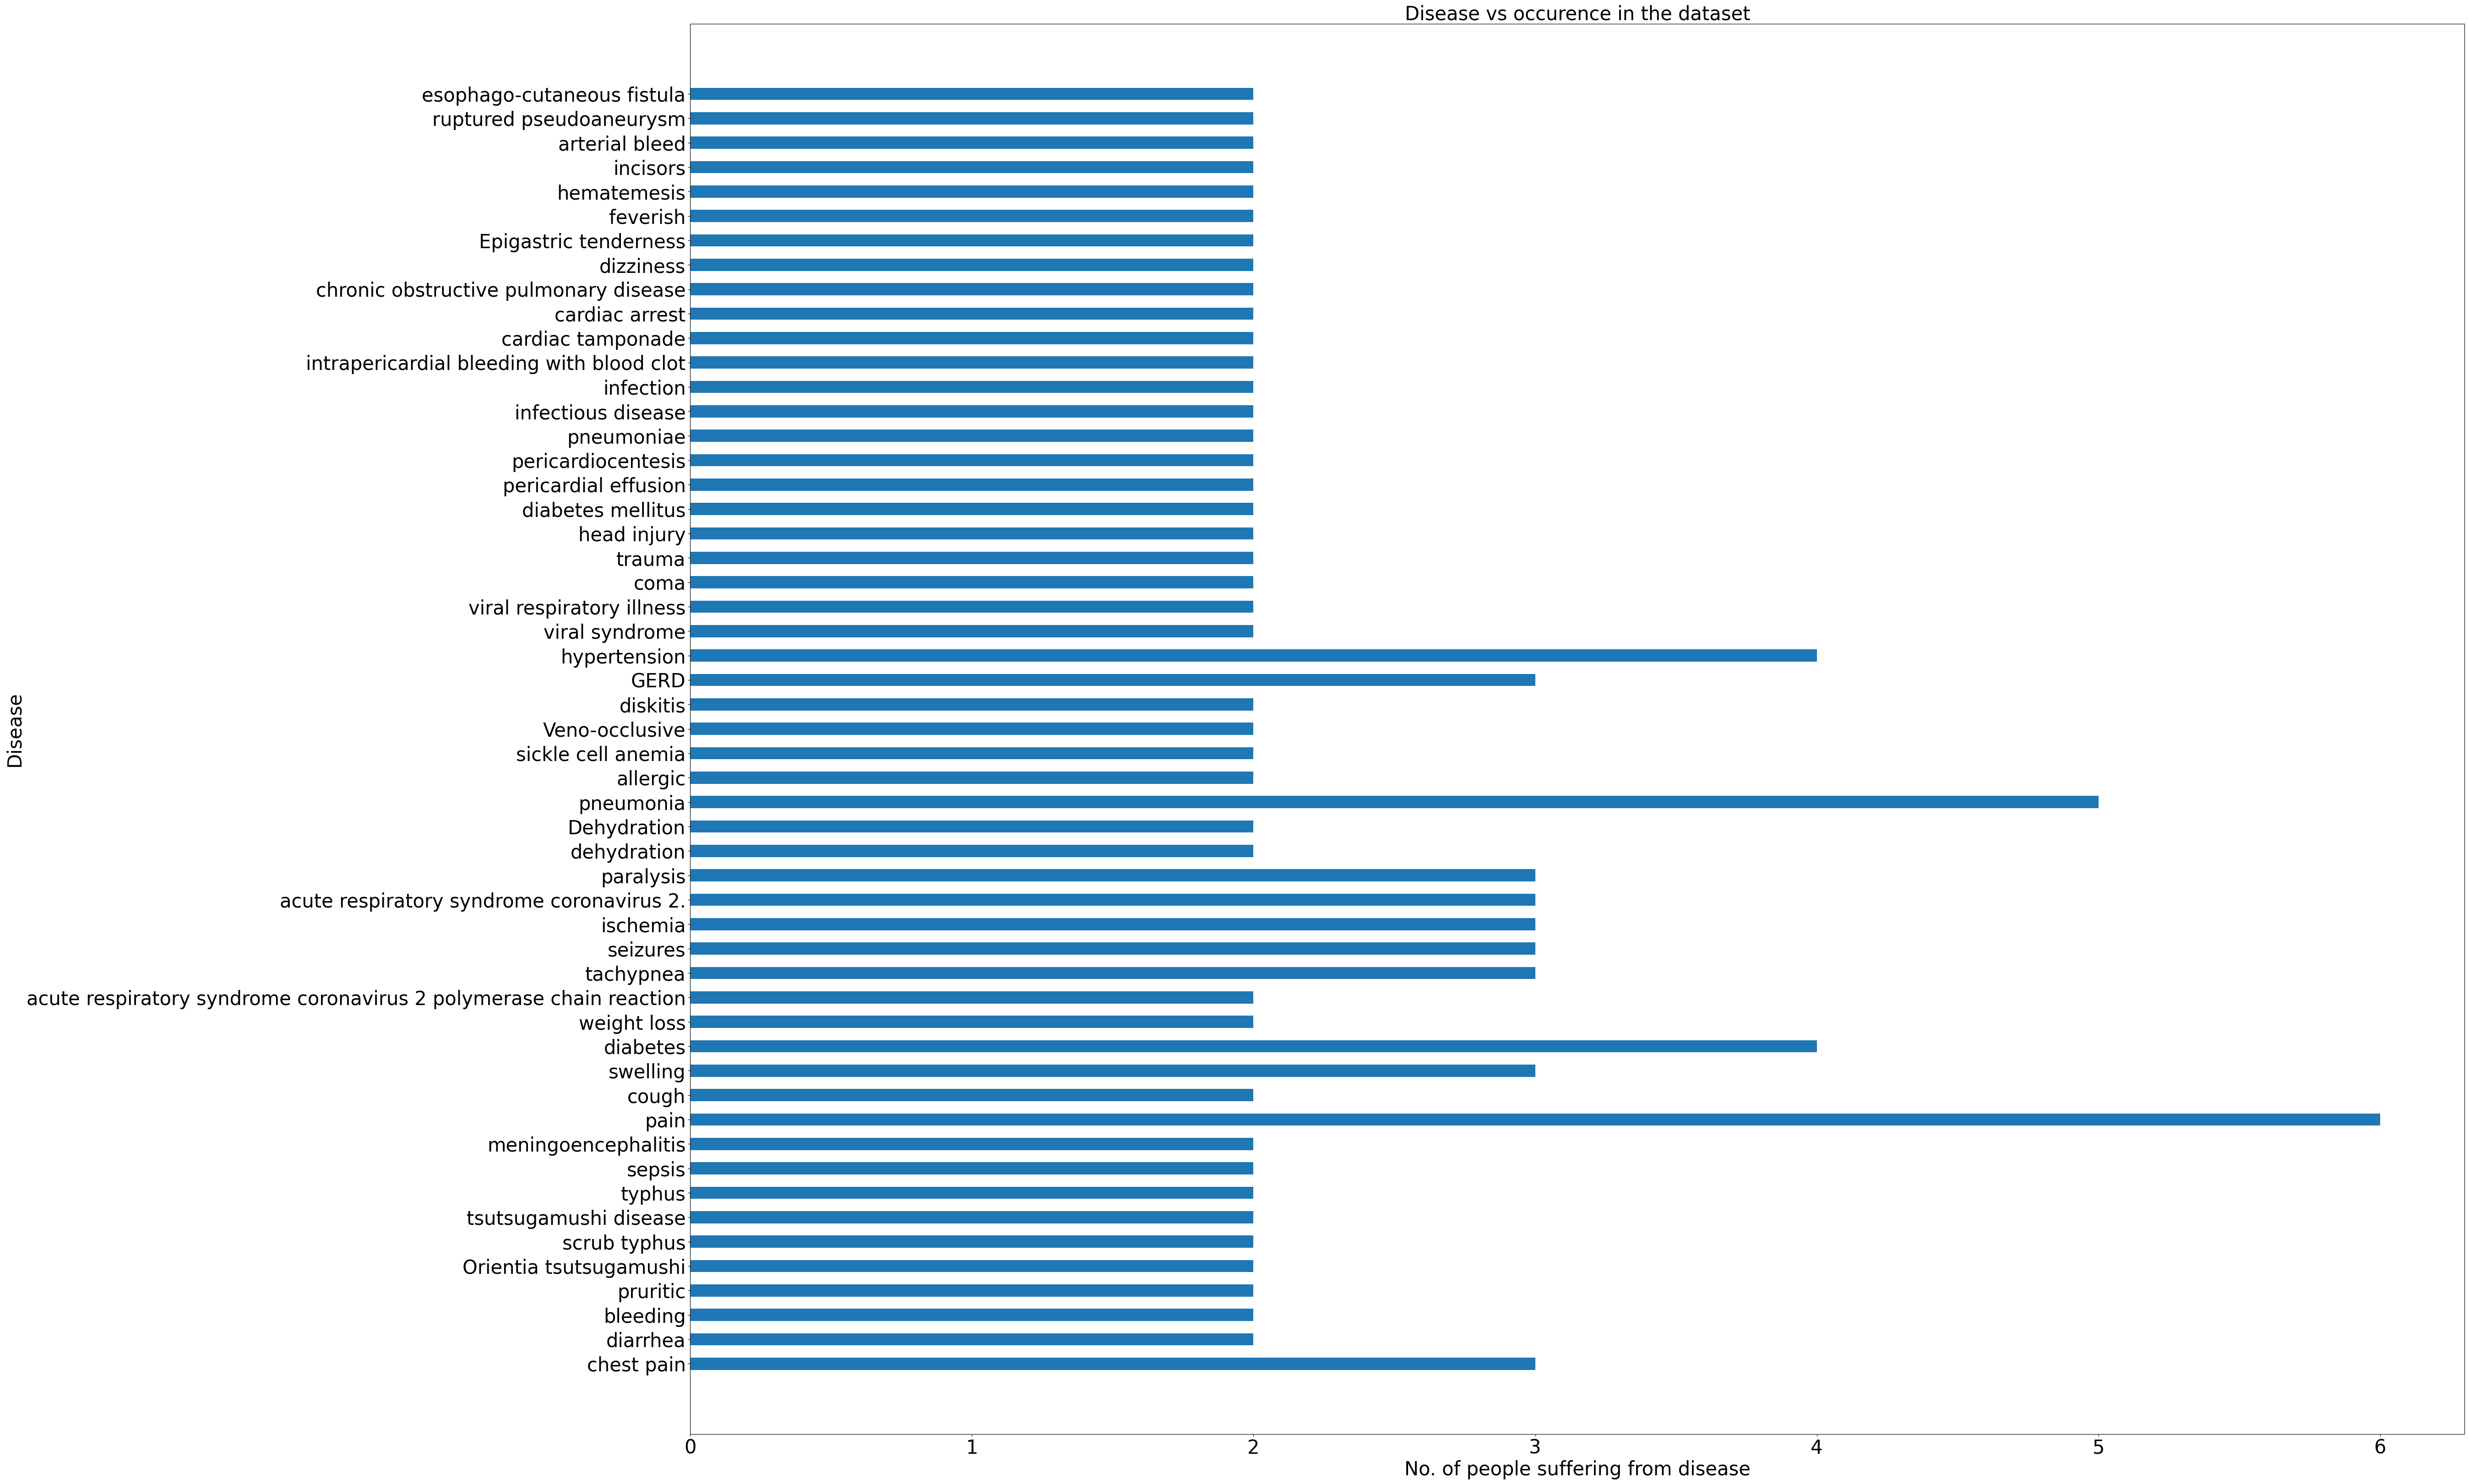

In [44]:
params = {'figure.figsize'  : (50, 40),
          'axes.labelsize'  : 30,
          'axes.titlesize'  : 30,
          'xtick.labelsize' : 30,
          'ytick.labelsize' : 30}
plt.rcParams.update(params)

plt.barh( list(diseases_to_plot), list(diseases_count_to_plot),
         height = 0.5, align = 'center')
plt.xlabel('No. of people suffering from disease')
plt.ylabel('Disease')
plt.title('Disease vs occurence in the dataset')